In [3]:
from roomba import Roomba, Room, Simulation
import statistics as st
import random
import matplotlib.pyplot as plt

In [9]:
roomba = Roomba(0,0)
room = Room(10, 10)
sim = Simulation(room, roomba)

In [10]:
sim.run()

{0.5: 94, 0.9: 329, 1.0: 655}

In [11]:
sim1000results = []
for i in range(1000):
    roomba = Roomba(0,0)
    room = Room(10, 10)
    sim = Simulation(room, roomba)
    sim1000results.append(sim.run())

In [13]:
st.mean([r[0.9] for r in sim1000results])

286.325

In [14]:
st.mean([r[1.0] for r in sim1000results])

661.777

In [15]:
class SideTurningRoomba(Roomba):
    def collide(self):
        if random.random() > 0.5:
            self.turn(random.randint(30, 120))
        else:
            self.turn(random.randint(240, 330))

In [17]:
def n_trials(n, roomba_type=Roomba):
    results = []
    for _ in range(n):
        roomba = roomba_type(0,0)
        room = Room(10, 10)
        sim = Simulation(room, roomba)
        results.append(sim.run())
    return (st.mean(r[0.5] for r in results),
            st.mean(r[0.9] for r in results),
            st.mean(r[1.0] for r in results)
           )

In [18]:
n_trials(100, Roomba)

(85.74, 281.45, 652.91)

In [19]:
n_trials(100, SideTurningRoomba)

(96.13, 335.44, 831.44)

In [20]:
class BackTurningRoomba(Roomba):
    def collide(self):
        self.turn(random.randint(120, 240))

In [21]:
n_trials(100, BackTurningRoomba)

(89.52, 306.4, 721.19)

In [22]:
%matplotlib inline

In [23]:
roomba_trials = n_trials(200, Roomba)
side_trials = n_trials(200, SideTurningRoomba)
back_trials = n_trials(200, BackTurningRoomba)

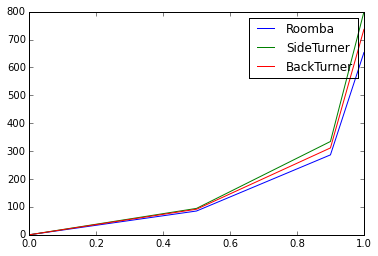

In [24]:
plt.plot([0, 0.5, 0.9, 1.0], [0] + list(roomba_trials), label="Roomba")
plt.plot([0, 0.5, 0.9, 1.0], [0] + list(side_trials), label="SideTurner")
plt.plot([0, 0.5, 0.9, 1.0], [0] + list(back_trials), label="BackTurner")
plt.legend()
plt.show()

In [25]:
class SpeedyRoomba(Roomba):
    def __init__(self, x=0, y=0, angle=0):
        super().__init__(x, y, angle)
        self.speed = 1.5

In [28]:
speed_trials = n_trials(200, SpeedyRoomba)
speed_trials

(89.93, 304.035, 755.05)

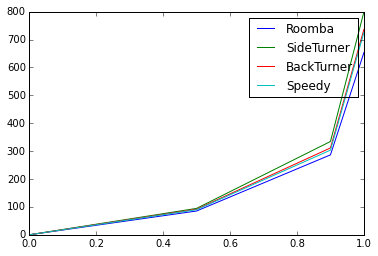

In [27]:
plt.plot([0, 0.5, 0.9, 1.0], [0] + list(roomba_trials), label="Roomba")
plt.plot([0, 0.5, 0.9, 1.0], [0] + list(side_trials), label="SideTurner")
plt.plot([0, 0.5, 0.9, 1.0], [0] + list(back_trials), label="BackTurner")
plt.plot([0, 0.5, 0.9, 1.0], [0] + list(speed_trials), label="Speedy")
plt.legend()
plt.show()

In [29]:
class SuperSpeedyRoomba(Roomba):
    def __init__(self, x=0, y=0, angle=0):
        super().__init__(x, y, angle)
        self.speed = 5.0

In [30]:
super_speed_trials = n_trials(200, SuperSpeedyRoomba)
super_speed_trials

(173.94, 610.96, 1524.985)